In [1]:
# Import the libraries

import pandas as pd
import numpy as np
import altair as alt
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.metrics import f1_score



# To ignore Warning
import warnings
warnings.filterwarnings('ignore')

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.23.5
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [2]:
# uploading dataset
df = pd.read_csv('/kaggle/input/student-semester-result/data.csv', low_memory=False)

In [3]:
#display the records
df.head(1)

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16


In [4]:
#display top 5 records
df.head()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16


In [5]:
#to display the top 10 records
df.head(10)

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
0,8.11,7.68,7.11,7.43,8.18,115,Female,NaN,17020.0,16
1,6.48,5.90,4.15,4.29,4.96,115,Male,NaN,17021.0,16
2,8.41,8.24,7.52,8.25,7.75,115,Female,NaN,17022.0,16
3,7.33,6.83,6.33,6.79,6.89,115,Male,NaN,17023.0,16
4,7.89,7.34,7.22,7.32,7.46,115,Male,NaN,17024.0,16
5,7.33,6.72,6.48,6.50,7.39,115,Male,NaN,17025.0,16
6,7.15,6.72,6.89,6.86,7.64,115,Male,NaN,17026.0,16
7,6.74,6.38,4.93,5.64,6.75,115,Male,NaN,17027.0,16
8,7.89,7.45,6.96,7.71,8.00,115,Female,NaN,17028.0,16
9,7.30,6.34,6.30,6.61,6.18,115,Male,NaN,17029.0,16


In [6]:
# Display last 5 records
df.tail()

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
173,7.48,7.55,7.67,7.39,8.65,241,F,17048.0,NaN,28
174,7.30,6.41,6.59,7.11,7.38,241,M,17049.0,NaN,28
175,6.30,6.28,5.89,5.71,6.50,241,M,17050.0,NaN,28
176,7.04,7.10,6.81,7.00,6.92,241,M,17051.0,NaN,28
177,6.70,6.81,6.52,5.39,7.00,241,M,17052.0,NaN,28


In [7]:
# Display last 10 records
df.tail(10)

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code
168,6.81,6.38,5.19,5.46,NaN,241,M,17043.0,NaN,28
169,6.63,7.03,7.00,6.75,7.38,241,M,17044.0,NaN,28
170,7.33,7.34,7.22,7.25,7.08,241,M,17045.0,NaN,28
171,7.15,7.79,7.41,NaN,7.50,241,M,17046.0,NaN,28
172,7.00,7.41,7.15,7.04,7.81,241,M,17047.0,NaN,28
173,7.48,7.55,7.67,7.39,8.65,241,F,17048.0,NaN,28
174,7.30,6.41,6.59,7.11,7.38,241,M,17049.0,NaN,28
175,6.30,6.28,5.89,5.71,6.50,241,M,17050.0,NaN,28
176,7.04,7.10,6.81,7.00,6.92,241,M,17051.0,NaN,28
177,6.70,6.81,6.52,5.39,7.00,241,M,17052.0,NaN,28


In [8]:
# Get statistical info about dataset
df.describe()

,1st,2nd,3rd,4th,5th,College Code,Roll,Roll no.,Subject Code
count,176.000000,174.000000,176.00000,173.000000,172.000000,178.000000,132.000000,46.000000,178.000000
mean,7.038864,6.943391,6.62250,7.027746,7.432558,152.983146,17040.666667,17042.500000,18.359551
std,0.859521,0.881088,0.91926,1.035675,1.068866,48.357599,13.622874,13.422618,4.782849
min,3.850000,3.900000,3.96000,4.290000,4.000000,115.000000,17017.000000,17020.000000,16.000000
25%,6.440000,6.380000,6.14000,6.330000,6.750000,115.000000,17029.000000,17031.250000,16.000000
50%,7.070000,6.800000,6.68500,7.070000,7.590000,116.000000,17040.000000,17042.500000,16.000000
75%,7.590000,7.612500,7.26000,7.860000,8.210000,165.000000,17051.000000,17053.750000,16.000000
max,9.150000,9.210000,9.59000,9.310000,9.460000,241.000000,17067.000000,17065.000000,28.000000


In [9]:
# GetList of column
df.columns

Index(['1st', '2nd', '3rd', '4th', '5th', 'College Code', 'Gender', 'Roll',
       'Roll no.', 'Subject Code'],
      dtype='object')

In [10]:
# Getting more info about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           176 non-null    float64
 1   2nd           174 non-null    float64
 2   3rd           176 non-null    float64
 3   4th           173 non-null    float64
 4   5th           172 non-null    float64
 5   College Code  178 non-null    int64  
 6   Gender        177 non-null    object 
 7   Roll          132 non-null    float64
 8   Roll no.      46 non-null     float64
 9   Subject Code  178 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.0+ KB


In [11]:
# Check for Null Values
df.isnull().sum()

1st               2
2nd               4
3rd               2
4th               5
5th               6
College Code      0
Gender            1
Roll             46
Roll no.        132
Subject Code      0
dtype: int64

In [13]:
# get the 5 point summary
df.describe()

,1st,2nd,3rd,4th,5th,College Code,Roll,Roll no.,Subject Code
count,176.000000,174.000000,176.00000,173.000000,172.000000,178.000000,132.000000,46.000000,178.000000
mean,7.038864,6.943391,6.62250,7.027746,7.432558,152.983146,17040.666667,17042.500000,18.359551
std,0.859521,0.881088,0.91926,1.035675,1.068866,48.357599,13.622874,13.422618,4.782849
min,3.850000,3.900000,3.96000,4.290000,4.000000,115.000000,17017.000000,17020.000000,16.000000
25%,6.440000,6.380000,6.14000,6.330000,6.750000,115.000000,17029.000000,17031.250000,16.000000
50%,7.070000,6.800000,6.68500,7.070000,7.590000,116.000000,17040.000000,17042.500000,16.000000
75%,7.590000,7.612500,7.26000,7.860000,8.210000,165.000000,17051.000000,17053.750000,16.000000
max,9.150000,9.210000,9.59000,9.310000,9.460000,241.000000,17067.000000,17065.000000,28.000000


In [14]:
# Check for Duplicate values
df[df.duplicated()]

,1st,2nd,3rd,4th,5th,College Code,Gender,Roll,Roll no.,Subject Code


<Axes: xlabel='Roll', ylabel='count'>

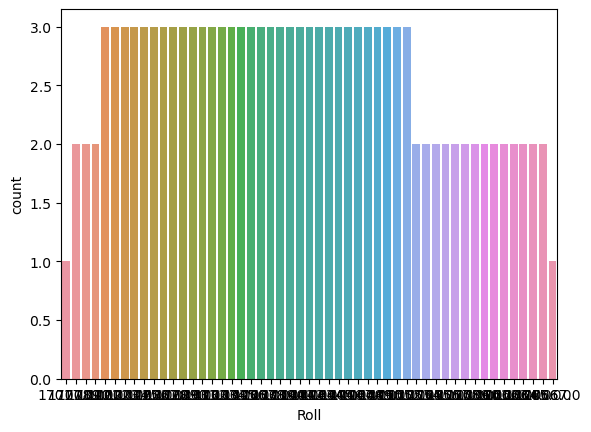

In [15]:
#countplot 
#Data Explore
sns.countplot(x='Roll', data=df)

<Axes: xlabel='College Code', ylabel='Density'>

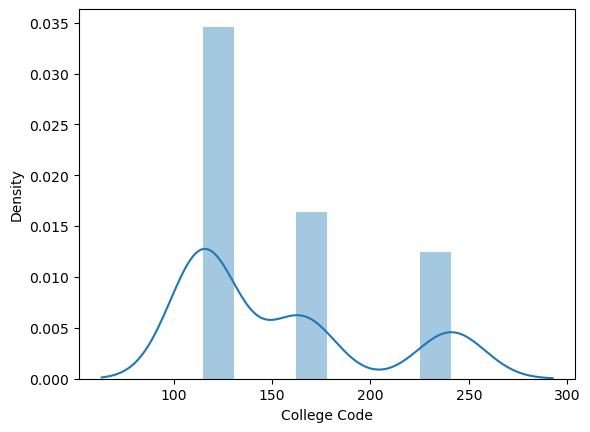

In [16]:
#data cleaning and preprocessing
#displot 
sns.distplot(df['College Code'])


<Axes: xlabel='3rd', ylabel='Density'>

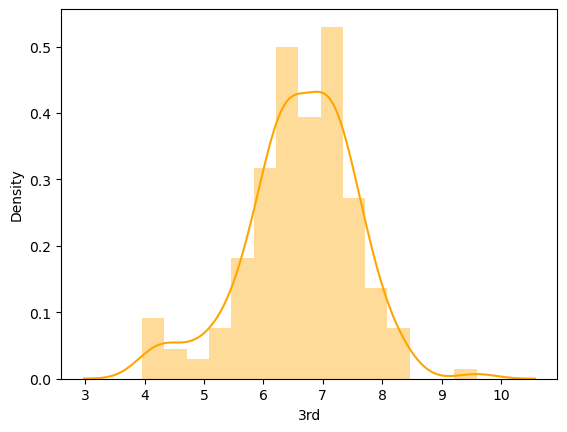

In [17]:
#data cleaning and preprocessing
#displot 
sns.distplot(df['3rd'],color='orange')

<Axes: >

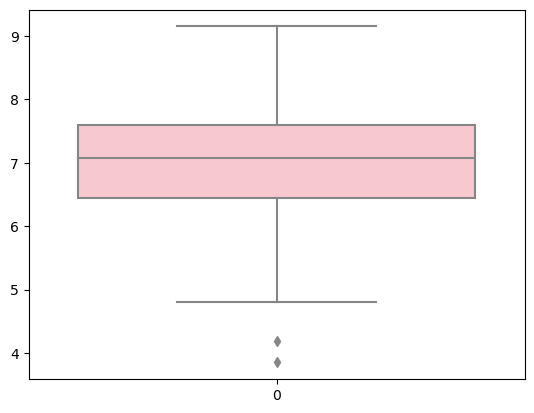

In [49]:
#boxplot for 1st
#Data Preprocessing 
sns.boxplot(df['1st'],color='pink')

<Axes: >

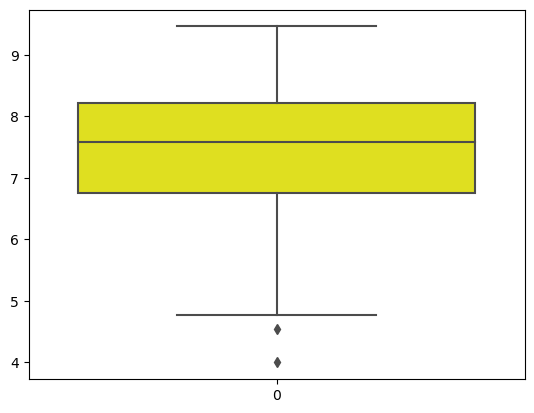

In [19]:
#Data Preprocessing 
#for Decision Making
sns.boxplot(df['5th'],color='yellow')

<Axes: >

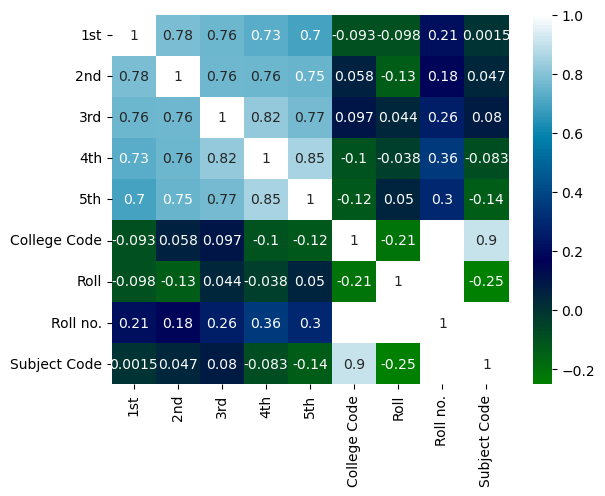

In [22]:

#Data Exploration and EDA
#for correration
sns.heatmap(df.corr(),annot=True,cmap='ocean')

In [24]:
#other type of heatmap
import pandas as pd
import altair as alt

numeric_df = df.select_dtypes(include=['float64', 'int64'])
cor_data = numeric_df.corr().stack().reset_index().rename(columns={0: 'Correlation', 'level_0': 'Variable 1', 'level_1': 'Variable 2'})
cor_data['Correlation'] = cor_data['Correlation'].map('{:.2f}'.format)
cor_data['Correlation'] = pd.to_numeric(cor_data['Correlation'])

base = alt.Chart(cor_data).encode(
    x='Variable 1:O',
    y='Variable 2:O'
)

text = base.mark_text().encode(
    text='Correlation',
    color=alt.condition(
        alt.datum.Correlation > 0.5,  # Corrected to 'Correlation' (uppercase C)
        alt.value('white'),
        alt.value('black')
    )
)

cor_plot = base.mark_rect().encode(
    color='Correlation:Q'
)

(cor_plot + text).properties(
    width=700,
    height=400
)


alt.LayerChart(...)

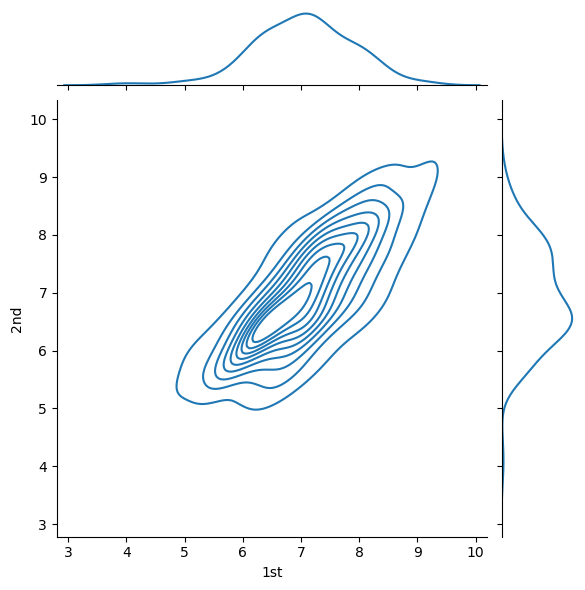

In [25]:
# for Customization
#Correlation Analysis
sns.jointplot(x='1st',y='2nd',data=df,kind='kde')

<Axes: xlabel='Gender', ylabel='count'>

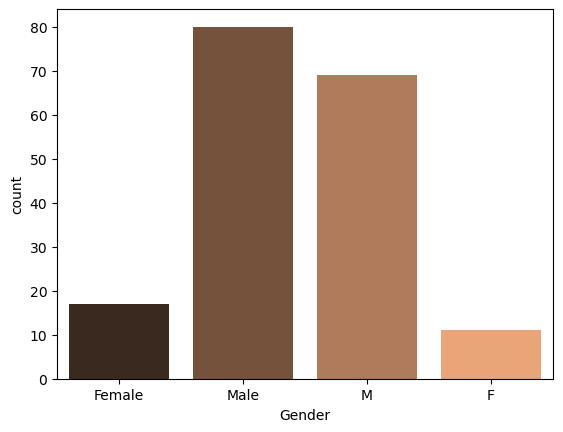

In [26]:
#for Data Cleaning
sns.countplot(x=df['Gender'],palette='copper')

In [27]:

#get more information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   1st           176 non-null    float64
 1   2nd           174 non-null    float64
 2   3rd           176 non-null    float64
 3   4th           173 non-null    float64
 4   5th           172 non-null    float64
 5   College Code  178 non-null    int64  
 6   Gender        177 non-null    object 
 7   Roll          132 non-null    float64
 8   Roll no.      46 non-null     float64
 9   Subject Code  178 non-null    int64  
dtypes: float64(7), int64(2), object(1)
memory usage: 14.0+ KB


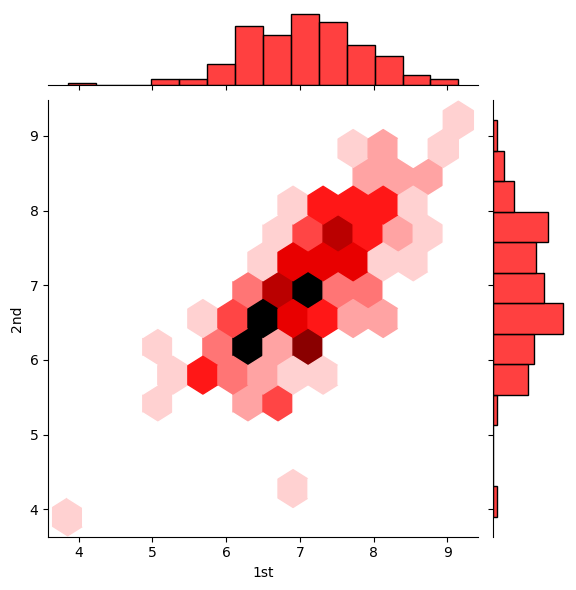

In [28]:
#Customization
#Correlation Analysis

sns.jointplot(x='1st',y='2nd',data=df,kind='hex',color='red')

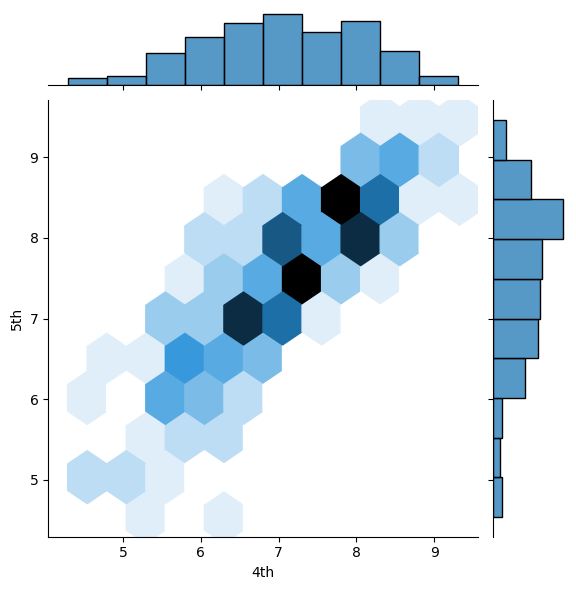

In [29]:

#Customization
#Correlation Analysis
sns.jointplot(x='4th',y='5th',data=df,kind='hex')

<Axes: xlabel='5th'>

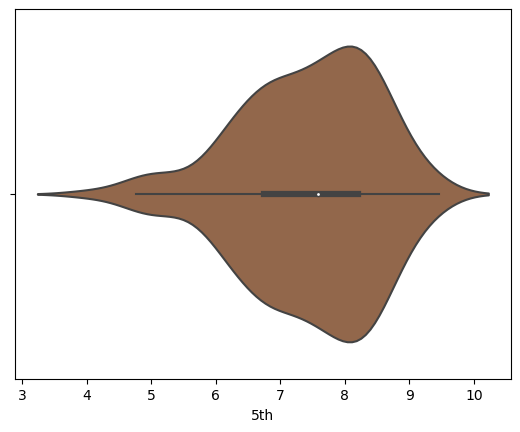

In [30]:
#Comparison of Distributions
sns.violinplot(x=df["5th"],palette='copper')

<Axes: xlabel='Subject Code'>

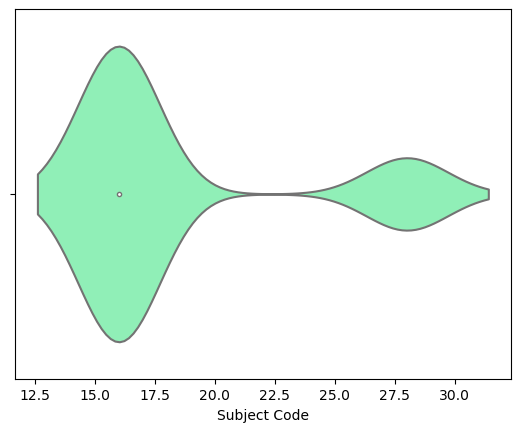

In [31]:
#Comparison of Distributions
sns.violinplot(x=df["Subject Code"],palette='rainbow')

<Axes: xlabel='1st', ylabel='2nd'>

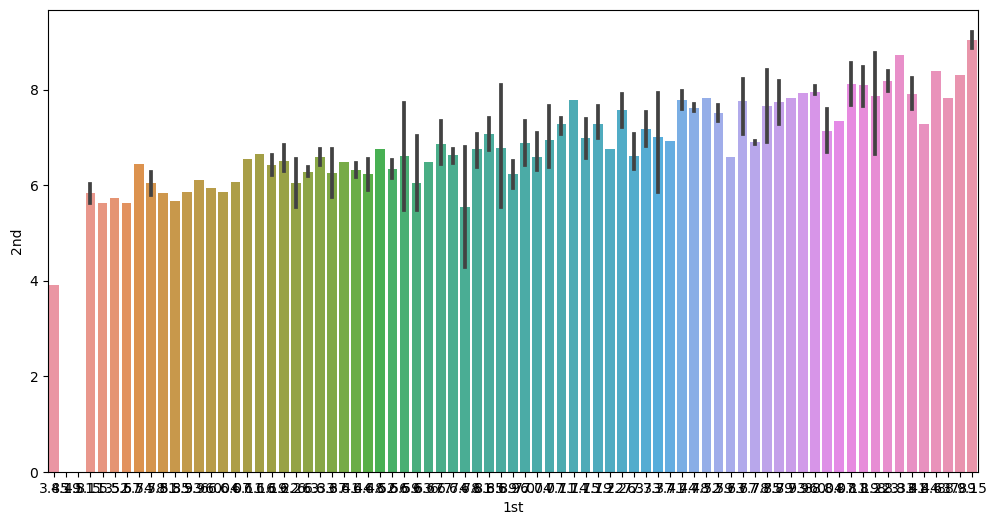

In [32]:
#barplot
#Comparison of Frequency or Count
plt.figure(figsize=(12, 6))
sns.barplot(x='1st', y='2nd', data=df)


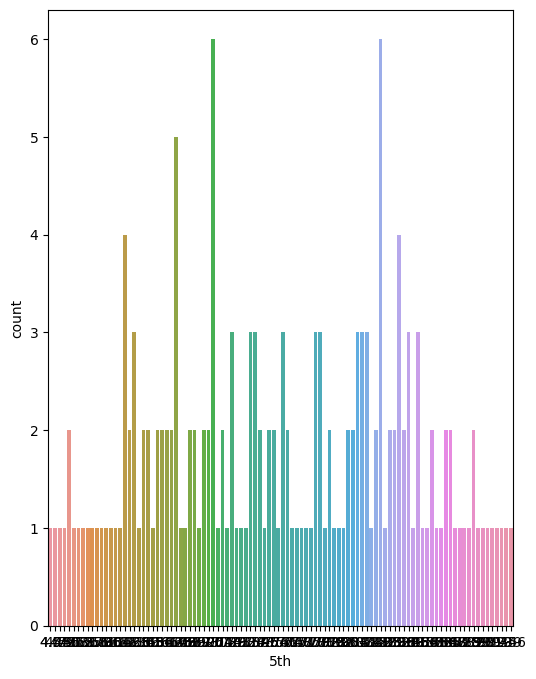

In [33]:

#Comparison of Frequency or Count
#countpolt
plt.figure(figsize=(6, 8))
sns.countplot(x='5th', data=df)
plt.show()

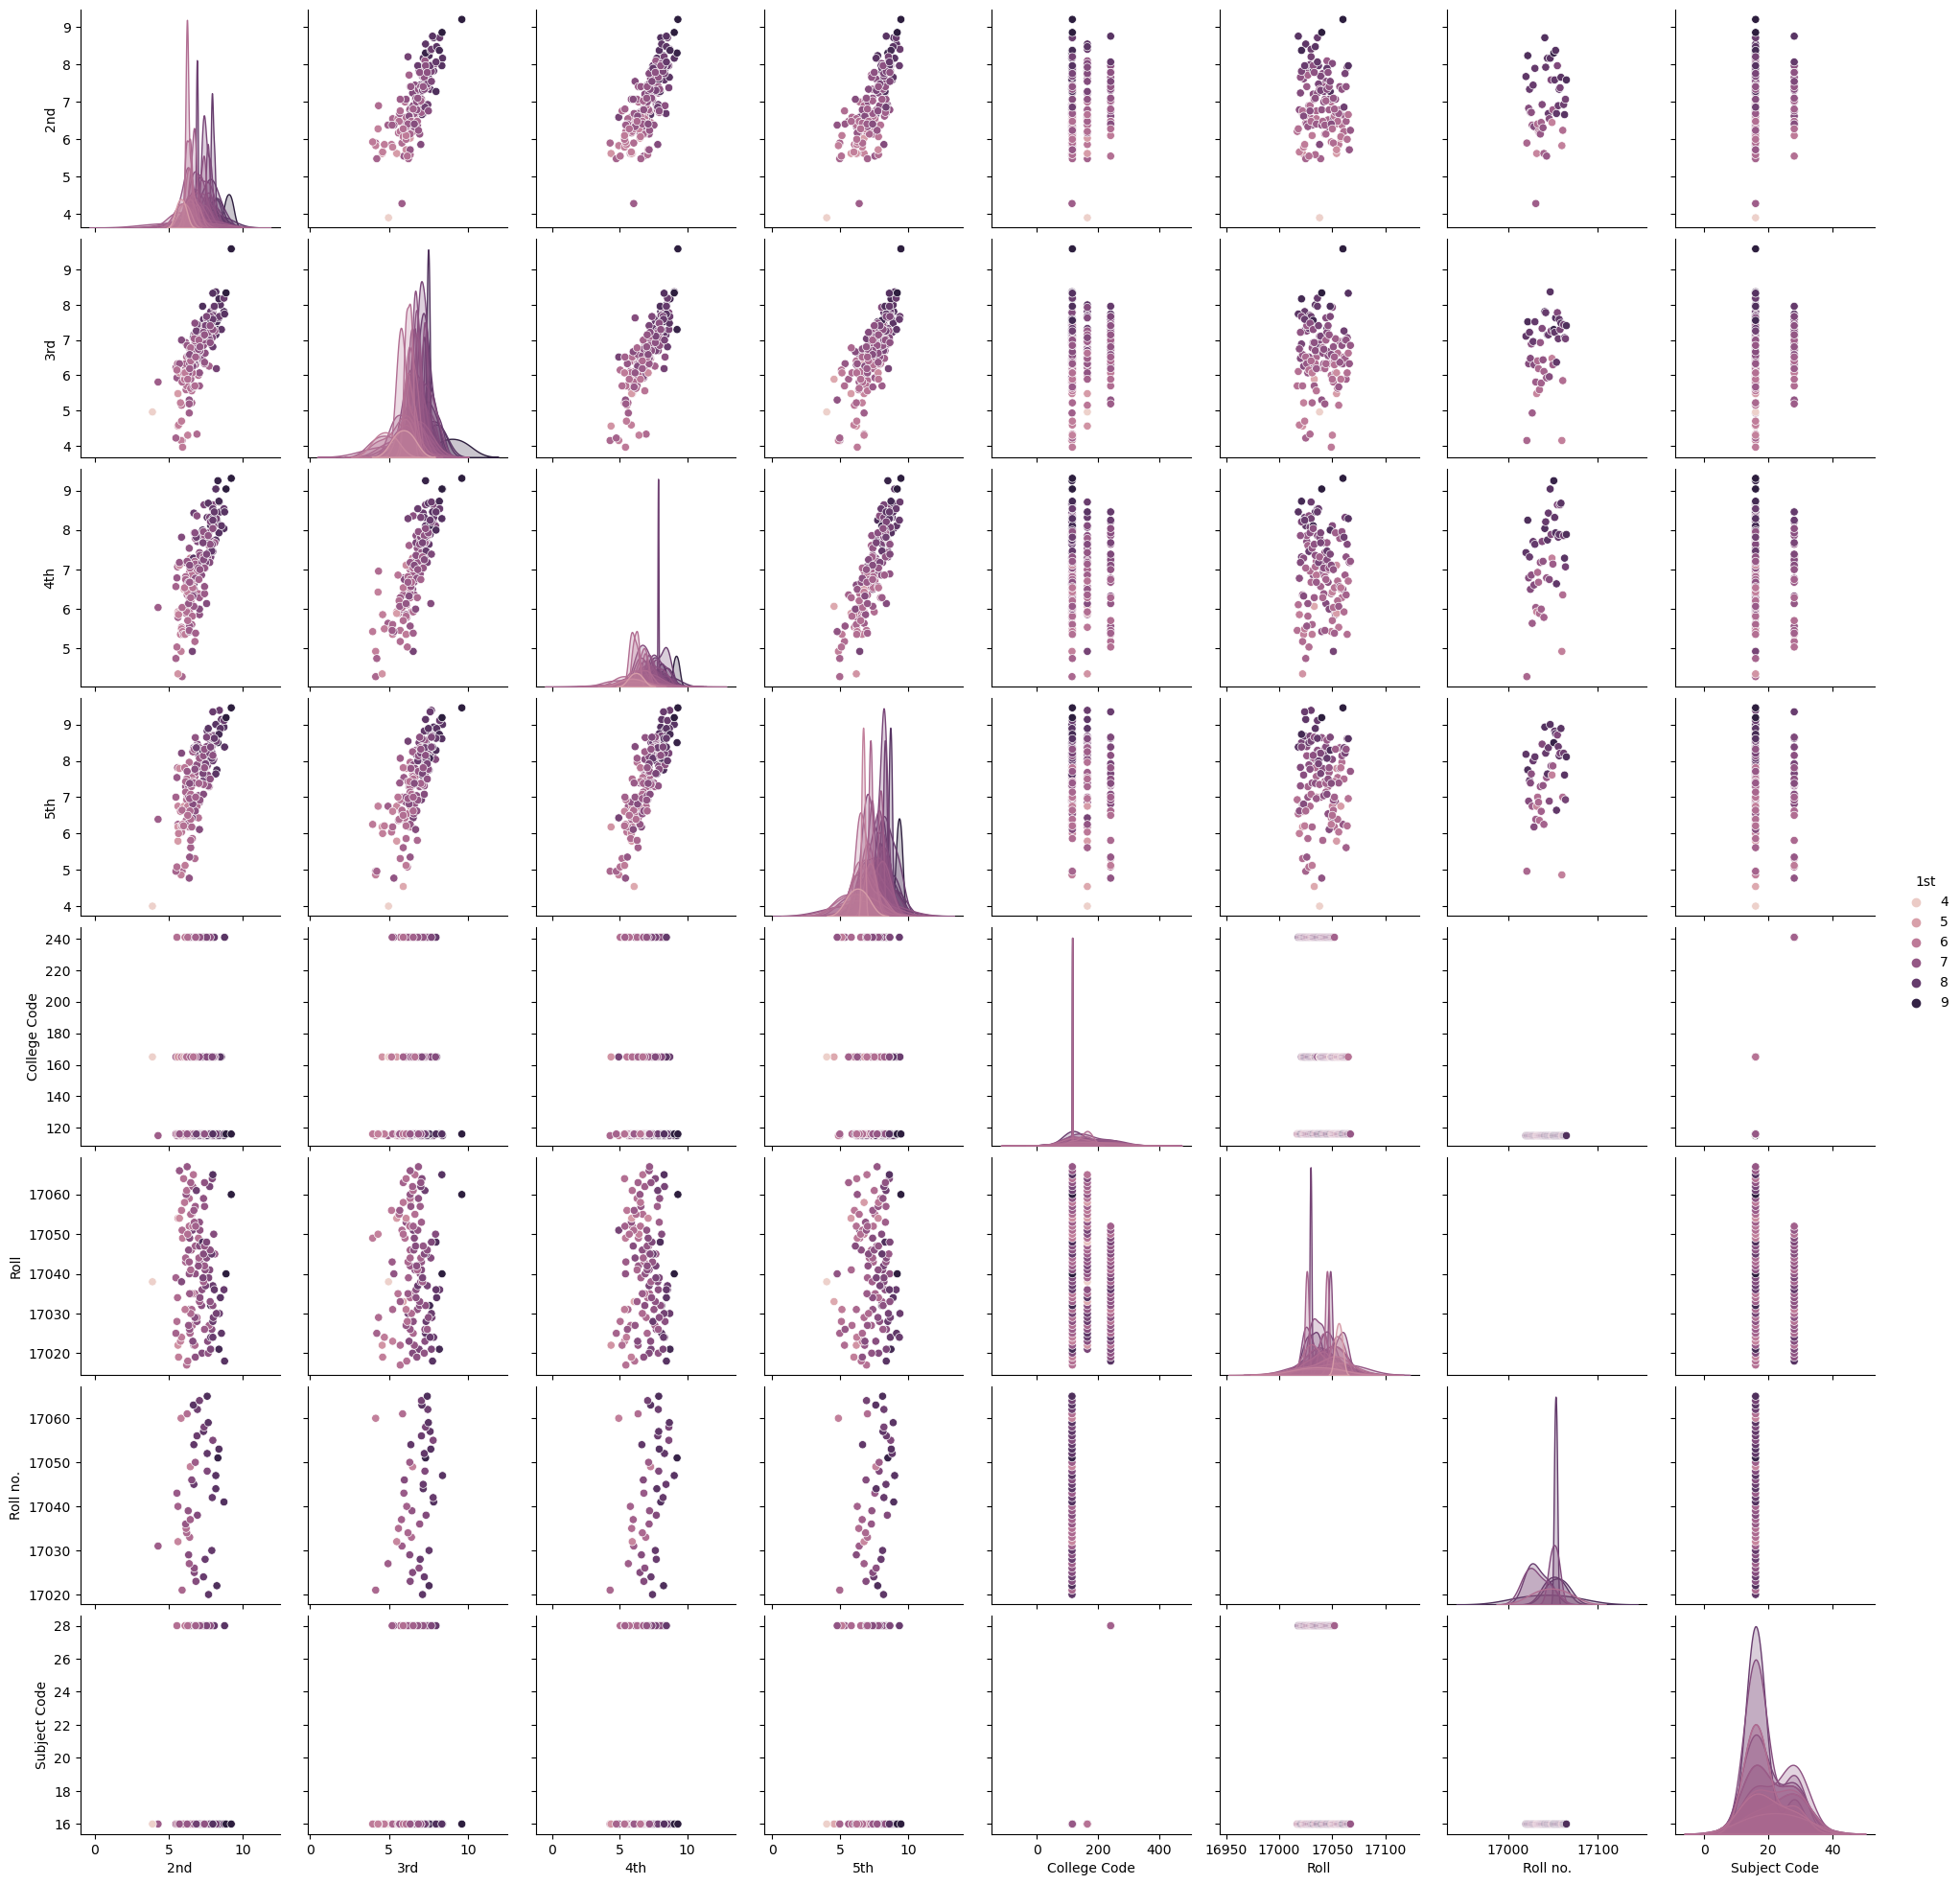

In [34]:
#Correlation Analysis
#pairplot
sns.pairplot(df, hue = '1st')

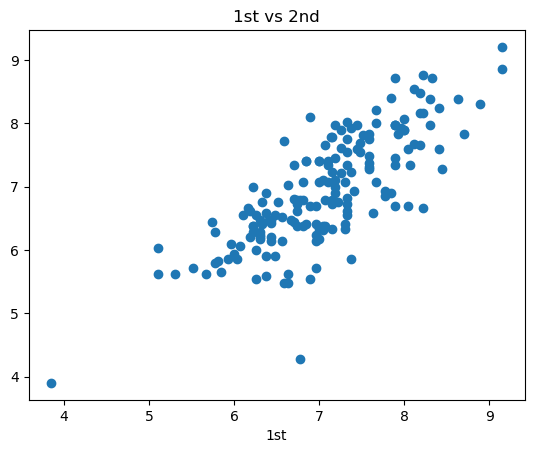

In [36]:
#Visualizing Relationships
#scatter plot for 1st vs 2nd
plt.scatter(df['1st'], df['2nd'])
plt.xlabel('1st')
plt.title('1st vs 2nd')
plt.show()

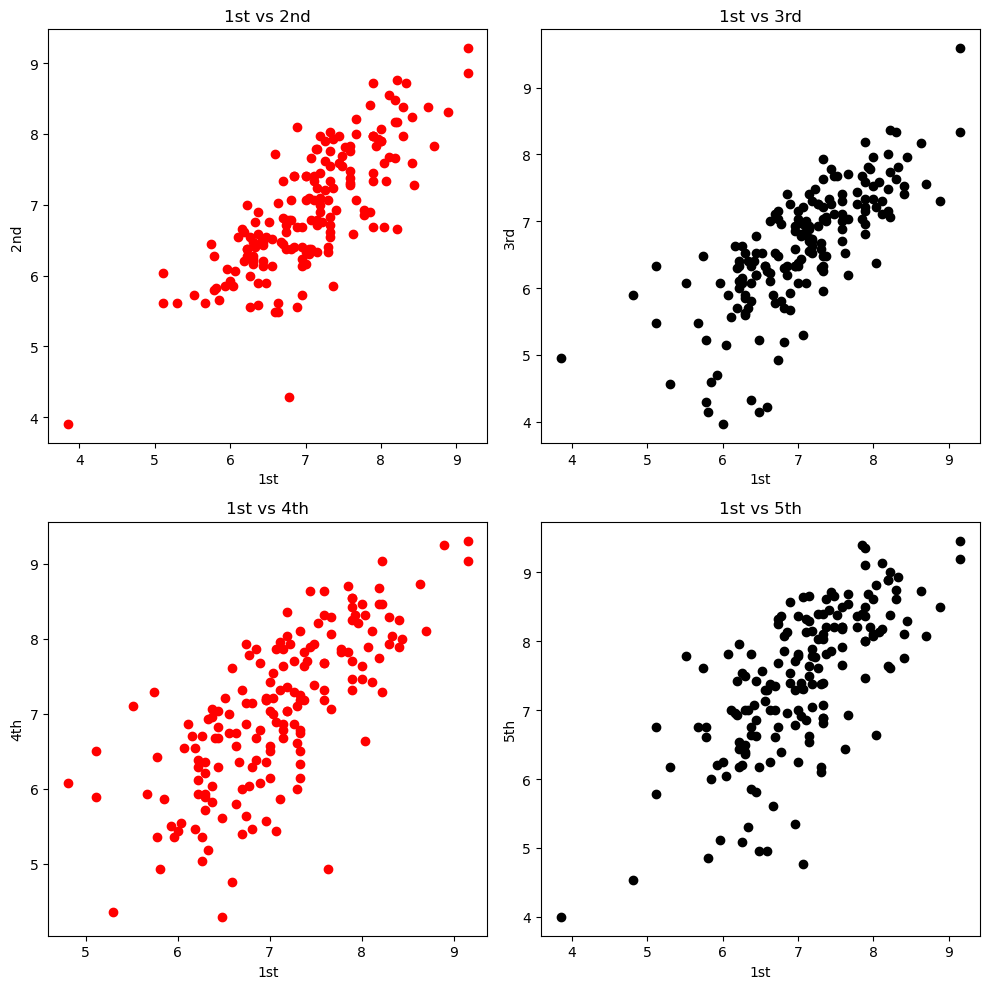

In [38]:
 #Visualizing Relationships
 #4 scatter plots using subplot
fig, axes = plt.subplots(2, 2, figsize=(10, 10))
axes[0, 0].scatter(df['1st'], df['2nd'],color='red')
axes[0, 0].set_xlabel('1st')
axes[0, 0].set_ylabel('2nd')
axes[0, 0].set_title('1st vs 2nd')
axes[0, 1].scatter(df['1st'], df['3rd'],color='black')
axes[0, 1].set_xlabel('1st')
axes[0, 1].set_ylabel('3rd')
axes[0, 1].set_title('1st vs 3rd')
axes[1, 0].scatter(df['1st'], df['4th'],color='red')
axes[1, 0].set_xlabel('1st')
axes[1, 0].set_ylabel('4th')
axes[1, 0].set_title('1st vs 4th')
axes[1, 1].scatter(df['1st'], df['5th'],color='black')
axes[1, 1].set_xlabel('1st')
axes[1, 1].set_ylabel('5th')
axes[1, 1].set_title('1st vs 5th')
plt.tight_layout()
plt.show()

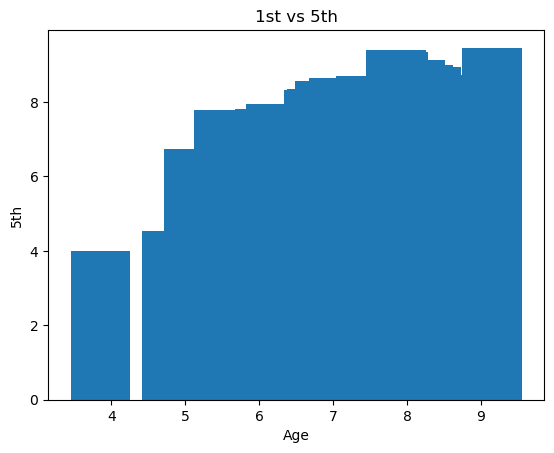

In [39]:
#bar plot for 1st vs 5th
##Comparing Data Across Categories
plt.bar(df['1st'], df['5th'])
plt.xlabel('Age')
plt.ylabel('5th')
plt.title('1st vs 5th')
plt.show()



<Axes: xlabel='Gender', ylabel='count'>

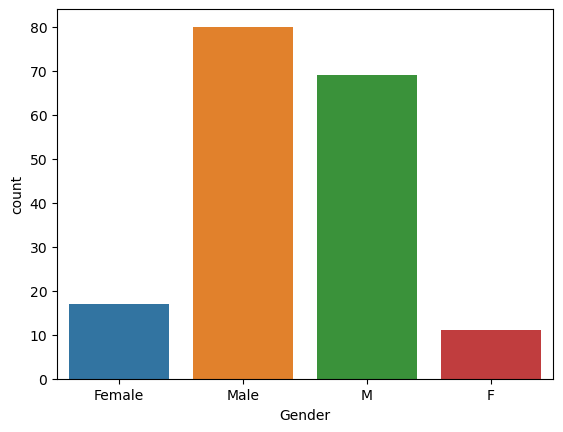

In [42]:
#Data Explore
#countplot for gender
sns.countplot(x='Gender', data=df)

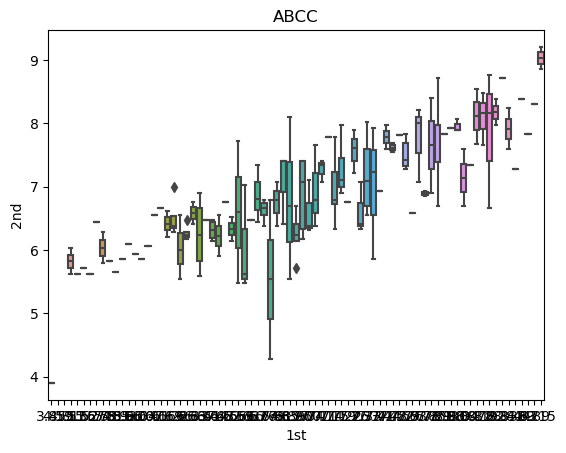

In [46]:
#Summary of Data Distribution
#Comparison of Distributions

sns.boxplot(x='1st',y='2nd',data=df)
plt.title('ABCC')
plt.show()

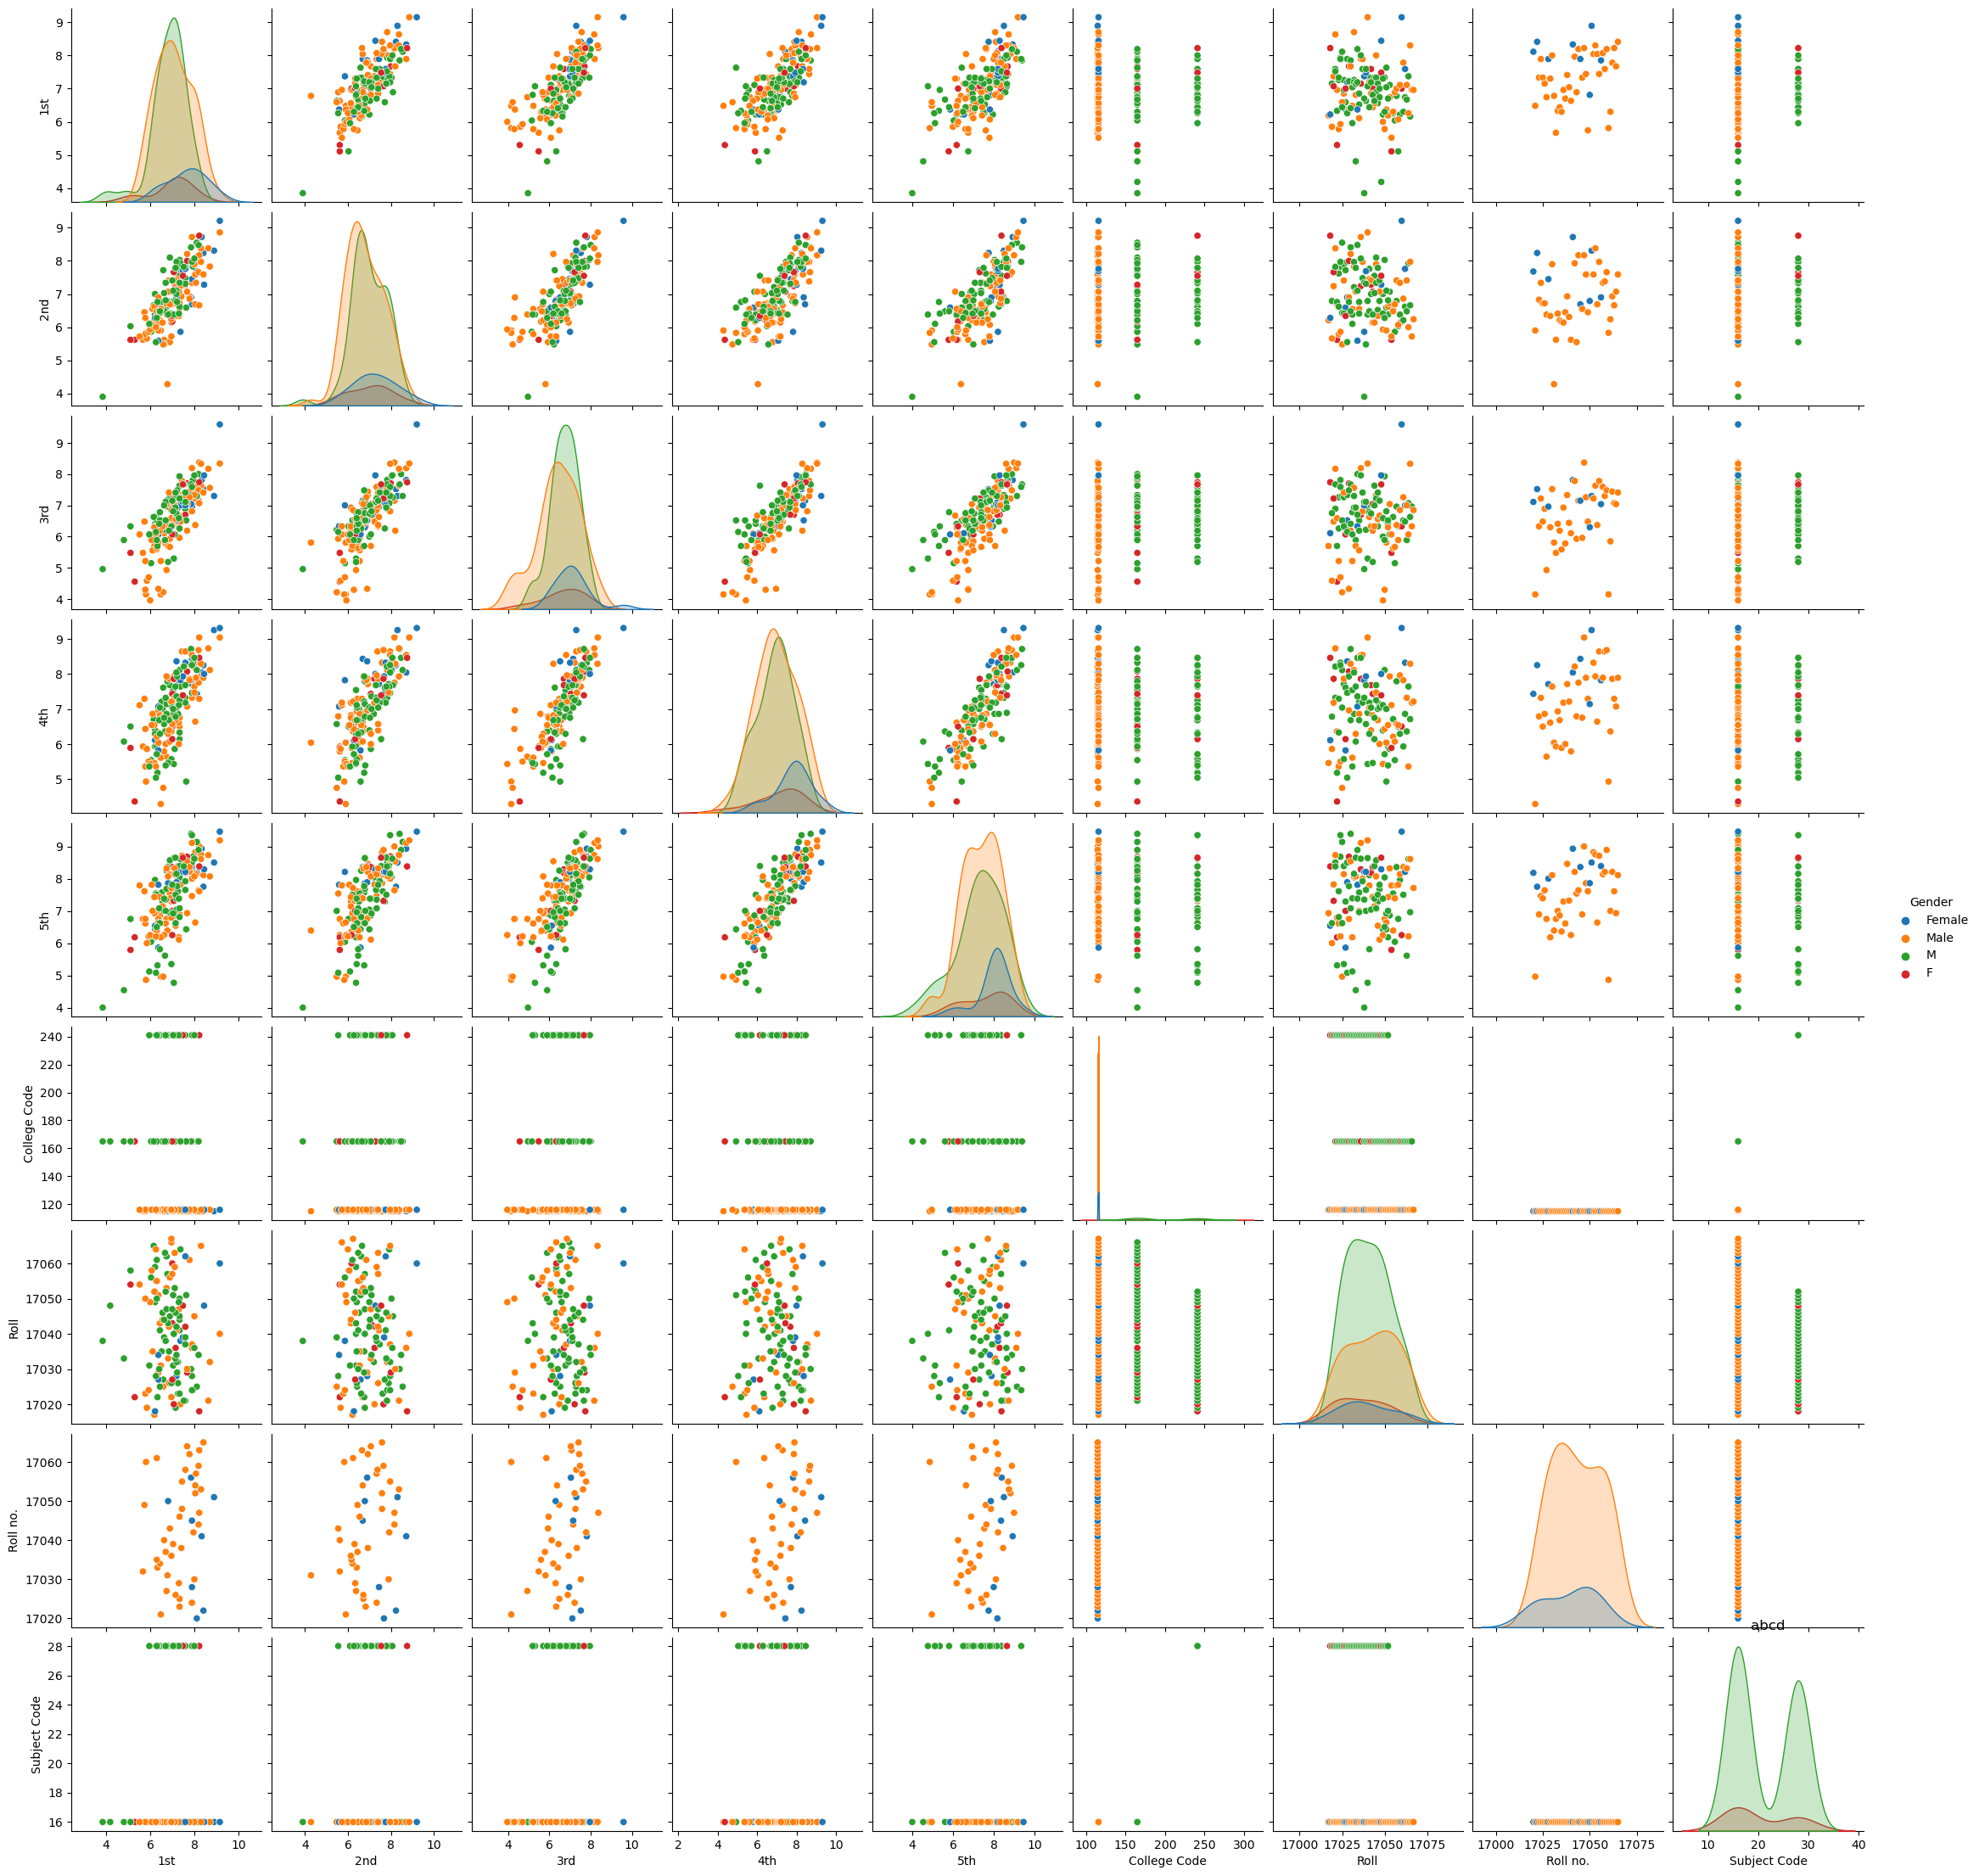

In [47]:
#Correlation Analysis
sns.pairplot(df,hue='Gender')
plt.title('abcd')
plt.show()